Instalación de librerias

In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


Instala la biblioteca seaborn

In [77]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importa la libreria seaborn

In [78]:
import seaborn as sns

Instalación de liberia para lectura de un archivo en excel

In [79]:
pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Exploración del DataSet 

In [80]:
df = pd.read_excel("Data_impo.xlsx")
df.head()


,No.,ID DECLARACIÓN,NIT,PASAPORTE,CONSIGNATARIO,FECHA,DIAS TARDA SALIR,año,Cantidad de importaciones,Aduana,Regimen,Peso Declaracion,Selectivo,Fraccion Arancelaria,Descripcion Fraccion,Pais Fraccion,Cantidad Fraccion,Unidad Medida,Valor Cif. $.,Región
0,1,295-1908743,48812894,NaN,Delgado Expo Sa,9/7/2021,16.0,2021,10.0,PA,ID,1112.00,R,8301409000,CERRADURA DE VITRINA TRADICIONALES MODELO 43535,CN,5.00,PZA,636.76,Sur
1,2,295-1908743,48812894,NaN,Delgado Expo Sa,9/7/2021,16.0,2021,10.0,PA,ID,1112.00,R,8301300000,"CERRADURA PARA MUEBLES, CROMADO MODELO 43561",CN,952.00,KGS,4621.22,Sur
2,3,263-8226467,13169795,NaN,Capitolio Comercializadora,25/5/2021,12.0,2021,3.0,EA,ID,45.45,R,8301300000,"CERRADURA PARA MUEBLES, ACABADO LATÓN BRILLANT...",CN,14400.00,PZA,3600.00,Central
3,4,133-2316913,82336545,NaN,Amigo Expo Sa,7/8/2021,9.0,2021,9.0,EA,ID,38.50,R,8301402000,"CERRADURA PARA MUEBLES, ACABADO LATÓN BRILLANT...",CN,60.96,MTS,1892.00,Central
4,5,226-8116176,45867462,NaN,Confianza Comercializadora,9/10/2021,5.0,2021,6.0,EA,ID,0.30,R,8205599000,"CUCHARA ALBAÑIL, 7"""", MÉRIDA, PRETUL MODELO 21057",MX,1.00,KGS,1.15,Central


Muestra cantidad de items y columnas del Data Set

In [81]:
df.shape

(10208, 20)

Identificación de columnas que tienen valores nulos o vacios (Se identificaron 3 columnas)

In [82]:
cols_con_na = [col for col in df.columns if (df[col].isnull().mean() > 0)]
cols_con_na

['PASAPORTE', 'DIAS TARDA SALIR', 'Cantidad de importaciones']

Muestra el porcentaje de valores nulos que tienen las columnas "NIT, PASAPORTE y SELECTIVO" del data SET

In [83]:
df.isnull().mean()

No.                          0.00000
ID DECLARACIÓN               0.00000
NIT                          0.00000
PASAPORTE                    0.99902
CONSIGNATARIO                0.00000
FECHA                        0.00000
DIAS TARDA SALIR             0.00098
año                          0.00000
Cantidad de importaciones    0.00098
Aduana                       0.00000
Regimen                      0.00000
Peso Declaracion             0.00000
Selectivo                    0.00000
Fraccion Arancelaria         0.00000
Descripcion Fraccion         0.00000
Pais Fraccion                0.00000
Cantidad Fraccion            0.00000
Unidad Medida                0.00000
Valor Cif. $.                0.00000
Región                       0.00000
dtype: float64

Se identifican 18 columnas rescatables del Data Set

In [84]:
cols_rescatables = [col for col in df.columns if (df[col].isnull().mean() <= 0.05)]
cols_rescatables

['No.',
 'ID DECLARACIÓN',
 'NIT',
 'CONSIGNATARIO',
 'FECHA',
 'DIAS TARDA SALIR',
 'año',
 'Cantidad de importaciones',
 'Aduana',
 'Regimen',
 'Peso Declaracion',
 'Selectivo',
 'Fraccion Arancelaria',
 'Descripcion Fraccion',
 'Pais Fraccion',
 'Cantidad Fraccion',
 'Unidad Medida',
 'Valor Cif. $.',
 'Región']

Se elimina columna "PASAPORTE"

In [85]:
df_noNAN = df[cols_rescatables].dropna()
df.shape, df_noNAN.shape

((10208, 20), (10198, 19))

Muestra todas las columnas que contienen datos categorizados en lugar de datos numéricos o de otro tipo.

In [86]:
def getCategoryVars(dataset):
     cat_colnames = []
     colnames = dataset.columns
     for col in colnames:
          if(dataset[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames

Muestra la exclusión de la columna PASAPORTE que contenia en su mayoría valores nulos

In [87]:
cat_cols = getCategoryVars(df)
cat_cols

['ID DECLARACIÓN',
 'CONSIGNATARIO',
 'FECHA',
 'Aduana',
 'Regimen',
 'Selectivo',
 'Descripcion Fraccion',
 'Pais Fraccion',
 'Unidad Medida',
 'Región']

Devuelve las columnas que contienen datos discretos, continuos y categóricos

In [92]:
def getDateColTypes(df):
       categoricas = []
       continuas = []
       discretas = []

       for colName in df.columns:
              if (df_noNAN[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((df_noNAN[colName].dtype == 'int64') or (df_noNAN[colName].dtypes == 'float64')):
                            if(len(df_noNAN[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas

In [93]:
discretas, continuas, categoricas = getDateColTypes(df_noNAN)

Muestra las columnas con datos continuos

In [94]:
continuas

['No.',
 'NIT',
 'DIAS TARDA SALIR',
 'año',
 'Cantidad de importaciones',
 'Peso Declaracion',
 'Fraccion Arancelaria',
 'Cantidad Fraccion',
 'Valor Cif. $.']

Muestra las columnas con datos categoricos

In [95]:
categoricas

['ID DECLARACIÓN',
 'CONSIGNATARIO',
 'FECHA',
 'Aduana',
 'Regimen',
 'Selectivo',
 'Descripcion Fraccion',
 'Pais Fraccion',
 'Unidad Medida',
 'Región']

Se verifica que la columna PASAPORTE fue excluida en el proceso.

In [96]:
df_noNAN.head()

,No.,ID DECLARACIÓN,NIT,CONSIGNATARIO,FECHA,DIAS TARDA SALIR,año,Cantidad de importaciones,Aduana,Regimen,Peso Declaracion,Selectivo,Fraccion Arancelaria,Descripcion Fraccion,Pais Fraccion,Cantidad Fraccion,Unidad Medida,Valor Cif. $.,Región
0,1,295-1908743,48812894,Delgado Expo Sa,9/7/2021,16.0,2021,10.0,PA,ID,1112.00,R,8301409000,CERRADURA DE VITRINA TRADICIONALES MODELO 43535,CN,5.00,PZA,636.76,Sur
1,2,295-1908743,48812894,Delgado Expo Sa,9/7/2021,16.0,2021,10.0,PA,ID,1112.00,R,8301300000,"CERRADURA PARA MUEBLES, CROMADO MODELO 43561",CN,952.00,KGS,4621.22,Sur
2,3,263-8226467,13169795,Capitolio Comercializadora,25/5/2021,12.0,2021,3.0,EA,ID,45.45,R,8301300000,"CERRADURA PARA MUEBLES, ACABADO LATÓN BRILLANT...",CN,14400.00,PZA,3600.00,Central
3,4,133-2316913,82336545,Amigo Expo Sa,7/8/2021,9.0,2021,9.0,EA,ID,38.50,R,8301402000,"CERRADURA PARA MUEBLES, ACABADO LATÓN BRILLANT...",CN,60.96,MTS,1892.00,Central
4,5,226-8116176,45867462,Confianza Comercializadora,9/10/2021,5.0,2021,6.0,EA,ID,0.30,R,8205599000,"CUCHARA ALBAÑIL, 7"""", MÉRIDA, PRETUL MODELO 21057",MX,1.00,KGS,1.15,Central


Instalación de la biblioteca "summary tools"

In [97]:
pip install summarytools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


importando la libreria summarytools

In [98]:
from summarytools import dfSummary

instalacion de la libreria jinja2

In [99]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Muestra un resumen estadistico del df

In [100]:
dfSummary(df_noNAN)

c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,No.[int64],Mean (sd) : 5099.5 (2944.1)min < med < max:1.0 < 5099.5 < 10198.0IQR (CV) : 5098.5 (1.7),"10,198 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ID DECLARACIÓN[object],1. 241-31288792. 221-85086283. 277-67839644. 189-82865045. 346-46401616. 312-67580137. 120-80005988. 252-80812469. 217-640913410. 255-985971911. other,"96 (0.9%)96 (0.9%)61 (0.6%)61 (0.6%)60 (0.6%)57 (0.6%)57 (0.6%)53 (0.5%)48 (0.5%)44 (0.4%)9,565 (93.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cPW4TUQBG0efIikgzlmXJi/EislgW4d1YlqcgUZqhIDQUYP6uhTmnoqCY4mo8PL2P1bIsAwoPt34A/h9iIyM2MmIjIzYyYiMjNjJiIyM2MqsxxtMYYyzL8nLjZ+HOrXe73fMYY6xWq4+C4296mKZpO03TdozxeOuH4b75ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mut5ns/vf3676ZNw92wQyKz8l1lUvNnIWFeRsa4i4+iDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZ18LJGLyQ8WYjY/BCxuCFjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxjcbGT+jZKyryFhXkfHNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGvhZKyryHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjA0CGesqMt5sZKyryFhXkXH0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGvhZAxeyHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IeObjYyfUTLWVWSsq8j4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca1cDLWVWS82cgYvJAxeCHj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJD5+mZzJZzf8XbNL+N6t9s9v28Q4JfM83y+ZjC1nqZpezgcXjabzWv1cNyPy+Xy4Xg8bk+n0+MY4/uxjTHGZrN53e/3n5Kn4x49XfOXnLORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRWY/x5ZrIrR+Ef9PPtLOe5/l8PB6348prIvCt99HUDwdTroXzJ1x1LdzghYx/IJARGxmxkREbGbGRERsZsZERGxmxkfkMN8cQJ9LzEfAAAAAASUVORK5CYII="">",0(0.0%)
3,NIT[int64],Mean (sd) : 55823542.9 (26249972.4)min < med < max:12210013.0 < 58906531.0 < 99471985.0IQR (CV) : 42875528.0 (2.1),86 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3cTY7aMBiA4c9lgPCjIIQEOy5QqQuWOUQP2yPMghNwA3ZICAWRTkQI6aoVlab8xHHxZ95nb8aLV8Y28piqqgTw3ZdnTwC4x9uzJ4BmGWN6ItKpOfxYVdVHk/NpCqEGxBjTm0wm3+M4HtcZv9/vd8aYHz7GSqhh6cRxPE6S5GM0GuWPDEzTNFoul+PtdtsREUKFe6PRKJ9Opz9rDO01PpmGcJiCCjdX1FA359Dlaqghb86hy60VNdjNOXS56zAV4uYcugR76rfcW4uwv/ZKkKHa7q1F2F/7JshQxWJvLcL+2kehhioiVntrEfbXXuHCHyoQKlQI+qsfjynLsi0isTGm7kc4uykhVIiISJZl7aIovs3n81ar1Xr4ACri9qaEUCEiIsfj8S2Kov5ischns9nu0fGub0oIFX8ZDAZe3pRwmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFfgJ1TOWb73i8/ncbnI+viBUj9i+9SqKIirL8mue5+8iUvf3ei95HarF6qJ1ZbF667Ver8er1ap/Op1aLib3TN6GarO6aF9Z6r712u12wb7z8jZUsVhdQl5ZXpXPoYpIvdUl5JXlVXkfKvSwfHN19b0VoaIRtm+ubr23IlQ0wubN1T3vrQjVgRe8VvvD4s3V1XMFoTbsla/VXCLUf7A4GMTD4XCaJMmea7XmEOonbA4Gv1fFbrf7zrVacwj1EzYHA1ZFN5yGanmv9vSDRZ2DAauiG85Ctb1X42CBS85Ctf1fRnyF4pLzPWrdezW+QnGJpyhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKdz3uS

In [101]:
df_noNAN.columns

Index(['No.', 'ID DECLARACIÓN', 'NIT', 'CONSIGNATARIO', 'FECHA',
       'DIAS TARDA SALIR', 'año', 'Cantidad de importaciones', 'Aduana',
       'Regimen', 'Peso Declaracion', 'Selectivo', 'Fraccion Arancelaria',
       'Descripcion Fraccion', 'Pais Fraccion', 'Cantidad Fraccion',
       'Unidad Medida', 'Valor Cif. $.', 'Región'],
      dtype='object')

importado la libreria seaborn as sns

In [102]:
import seaborn as sns

grafico de barras de la columna peso declaracion

<Axes: xlabel='Peso Declaracion', ylabel='Count'>

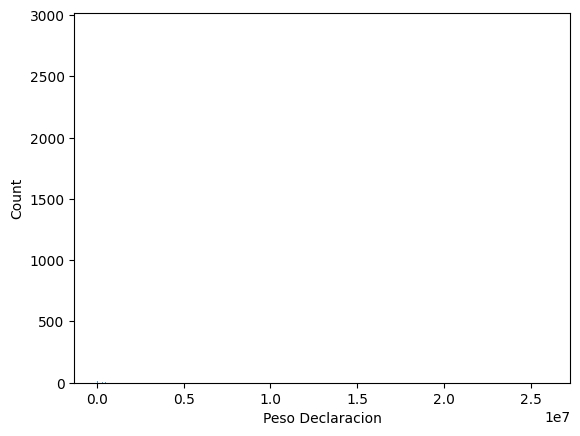

In [103]:
sns.histplot(data = df_noNAN, x='Peso Declaracion')

<Axes: xlabel='DIAS TARDA SALIR', ylabel='Count'>

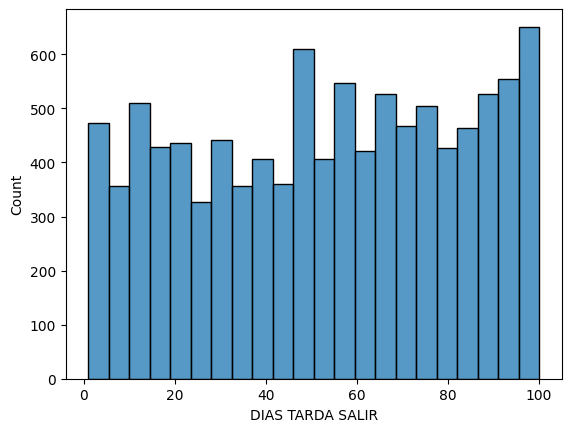

In [31]:
sns.histplot(data= df_noNAN, x='DIAS TARDA SALIR')

<Axes: xlabel='Valor Cif. $.', ylabel='Count'>

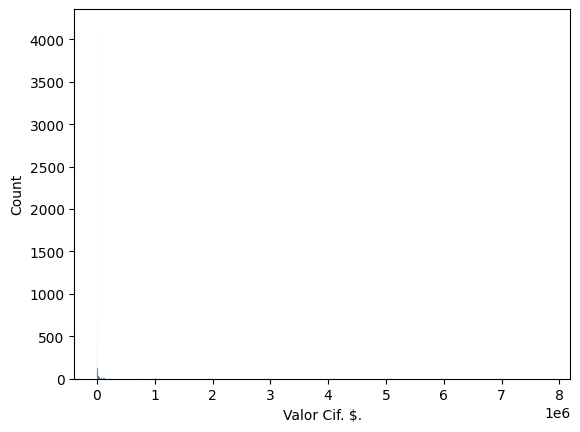

In [104]:
sns.histplot(data= df_noNAN, x='Valor Cif. $.')

<Axes: xlabel='Cantidad de importaciones', ylabel='Count'>

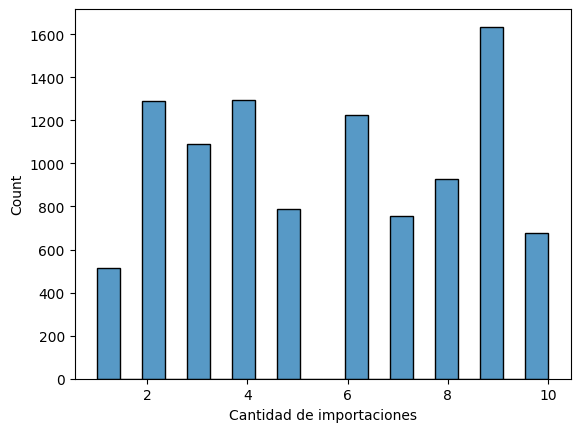

In [105]:
sns.histplot(data = df_noNAN, x='Cantidad de importaciones')

Es un subconjunto de df que contiene solo las columnas 'Peso Declaracion', 'DIAS TARDA SALIR', 'Cantidad de importaciones' y 'Valor Cif. $'.

In [106]:
data_clean = df_noNAN[['Peso Declaracion', 'DIAS TARDA SALIR','Cantidad de importaciones', 'Valor Cif. $.']]
data_clean

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
0,1112.00,16.0,10.0,636.76
1,1112.00,16.0,10.0,4621.22
2,45.45,12.0,3.0,3600.00
3,38.50,9.0,9.0,1892.00
4,0.30,5.0,6.0,1.15
...,...,...,...,...
10193,620.00,13.0,4.0,20.00
10194,620.00,13.0,4.0,40.00
10195,620.00,13.0,4.0,40.00
10196,620.00,13.0,4.0,40.00


Muestra la descripción estadística de los datos

In [107]:
data_clean.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,1.019800e+04,10198.000000,10198.000000,1.019800e+04
mean,5.464611e+04,16.184154,5.594332,2.745698e+04
std,5.154167e+05,7.901436,2.758509,1.847308e+05
min,1.500000e-01,1.000000,1.000000,5.000000e-02
25%,1.399360e+03,10.000000,3.000000,2.115850e+02
50%,8.870000e+03,16.000000,6.000000,1.752525e+03
75%,2.040880e+04,21.000000,8.000000,9.918778e+03
max,2.600000e+07,60.000000,10.000000,7.800000e+06


Es el mapa de calor que representa la correlación entre las variables 'Peso Declaracion', 'DIAS TARDA SALIR', 'Cantidad de importaciones' y 'Valor Cif. $'.", usando los datos del DataFrame "data_clean"

<Axes: >

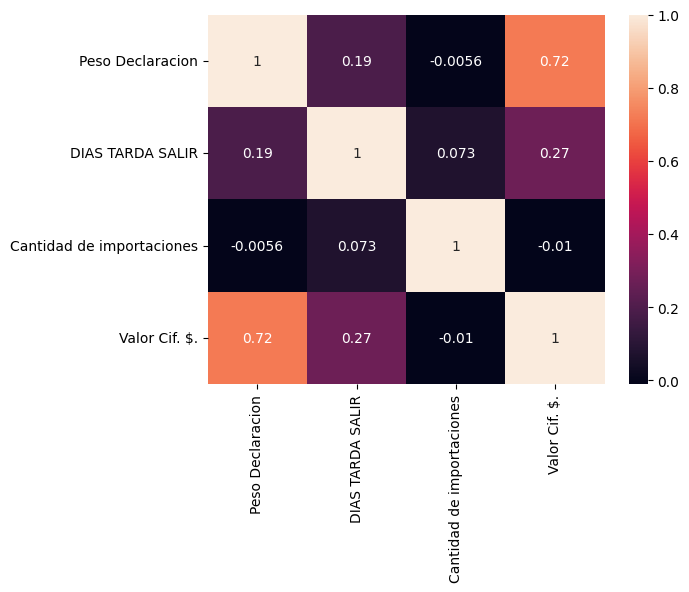

In [108]:
sns.heatmap( data_clean[['Peso Declaracion', 'DIAS TARDA SALIR','Cantidad de importaciones', 'Valor Cif. $.']].corr(),annot=True)

Muestra cómo identificar valores atípicos (outliers) en un conjunto de datos 

In [109]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =1399.36 Q3=20408.8 IQR =19009.44 umbral_inferior = -27114.799999999996 umbral_superior =48922.95999999999
Q1 =10.0 Q3=21.0 IQR =11.0 umbral_inferior = -6.5 umbral_superior =37.5
Q1 =3.0 Q3=8.0 IQR =5.0 umbral_inferior = -4.5 umbral_superior =15.5
Q1 =211.585 Q3=9918.7775 IQR =9707.192500000001 umbral_inferior = -14349.203750000002 umbral_superior =24479.566250000003


C:\Users\50233\AppData\Local\Temp\ipykernel_23160\178902799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\50233\AppData\Local\Temp\ipykernel_23160\178902799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\50233\AppData\Local\Temp\ipykernel_23160\178902799.py:14: SettingWithCopyWarning: 
A value is trying 

Muestra la data

In [110]:
data_clean

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,Peso Declaracion_outliers,DIAS TARDA SALIR_outliers,Cantidad de importaciones_outliers,Valor Cif. $._outliers
0,1112.00,16.0,10.0,636.76,False,False,False,False
1,1112.00,16.0,10.0,4621.22,False,False,False,False
2,45.45,12.0,3.0,3600.00,False,False,False,False
3,38.50,9.0,9.0,1892.00,False,False,False,False
4,0.30,5.0,6.0,1.15,False,False,False,False
...,...,...,...,...,...,...,...,...
10193,620.00,13.0,4.0,20.00,False,False,False,False
10194,620.00,13.0,4.0,40.00,False,False,False,False
10195,620.00,13.0,4.0,40.00,False,False,False,False
10196,620.00,13.0,4.0,40.00,False,False,False,False


Cuenta cuántas filas tienen el mismo valor en la columna 'Peso Declaracion_outliers' y muestra los resultados.

In [111]:
data_clean.groupby(by='Peso Declaracion_outliers').count()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,DIAS TARDA SALIR_outliers,Cantidad de importaciones_outliers,Valor Cif. $._outliers
Peso Declaracion_outliers,,,,,,,
False,9531,9531,9531,9531,9531,9531,9531
True,667,667,667,667,667,667,667


Cuenta cuántas filas tienen el mismo valor en la columna 'DIAS TARDA SALIR_outliers' y muestra los resultados.

In [112]:
data_clean.groupby(by='DIAS TARDA SALIR_outliers').count()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,Peso Declaracion_outliers,Cantidad de importaciones_outliers,Valor Cif. $._outliers
DIAS TARDA SALIR_outliers,,,,,,,
False,10101,10101,10101,10101,10101,10101,10101
True,97,97,97,97,97,97,97


In [113]:
data_clean.groupby(by='Cantidad de importaciones_outliers').count()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,Peso Declaracion_outliers,DIAS TARDA SALIR_outliers,Valor Cif. $._outliers
Cantidad de importaciones_outliers,,,,,,,
False,10198,10198,10198,10198,10198,10198,10198


Cuenta cuántas filas tienen el mismo valor en la columna 'Valor Cif. $._outliers' y muestra los resultados.

In [114]:
data_clean.groupby(by='Valor Cif. $._outliers').count()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,Peso Declaracion_outliers,DIAS TARDA SALIR_outliers,Cantidad de importaciones_outliers
Valor Cif. $._outliers,,,,,,,
False,8916,8916,8916,8916,8916,8916,8916
True,1282,1282,1282,1282,1282,1282,1282


Filtra del DataFrame "dataclean" y elimina las filas que contengan outliers en las tres columnas específicas: "Peso Declaracionoutliers", "DIAS TARDA SALIR_outliers", "Cantidad de importaciones_outliers" y "Valor Cif. $.outliers".
Después aplica los filtros y se crea un nuevo DataFrame llamado "data_noout" que contiene solo las filas sin outliers en las columnas mencionadas

In [115]:
data_noout =  data_clean[data_clean['Peso Declaracion_outliers'] == False]
data_noout = data_noout[data_noout['DIAS TARDA SALIR_outliers'] == False]
data_noout = data_noout[data_noout['Cantidad de importaciones_outliers'] == False]
data_noout = data_noout[data_noout['Valor Cif. $._outliers'] == False]
data_noout.reset_index(drop=True)

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,Peso Declaracion_outliers,DIAS TARDA SALIR_outliers,Cantidad de importaciones_outliers,Valor Cif. $._outliers
0,1112.00,16.0,10.0,636.76,False,False,False,False
1,1112.00,16.0,10.0,4621.22,False,False,False,False
2,45.45,12.0,3.0,3600.00,False,False,False,False
3,38.50,9.0,9.0,1892.00,False,False,False,False
4,0.30,5.0,6.0,1.15,False,False,False,False
...,...,...,...,...,...,...,...,...
8748,620.00,13.0,4.0,60.00,False,False,False,False
8749,620.00,13.0,4.0,20.00,False,False,False,False
8750,620.00,13.0,4.0,40.00,False,False,False,False
8751,620.00,13.0,4.0,40.00,False,False,False,False


Muestra estadísticas descriptivas sobre los datos en el DataFrame llamado "data_noout"

In [116]:
data_noout.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,8753.000000,8753.000000,8753.000000,8753.000000
mean,9674.010802,15.027419,5.602993,3676.630096
std,9602.056124,7.066279,2.746599,5417.682626
min,0.150000,1.000000,1.000000,0.050000
25%,1144.290000,10.000000,3.000000,149.290000
50%,5710.080000,15.000000,6.000000,1076.330000
75%,19050.860000,20.000000,8.000000,4747.090000
max,48916.000000,37.000000,10.000000,24332.000000


Muestra el histograma de la variable 'Peso Declaración' del conjunto de datos 'data_noout'

<Axes: xlabel='Peso Declaracion', ylabel='Count'>

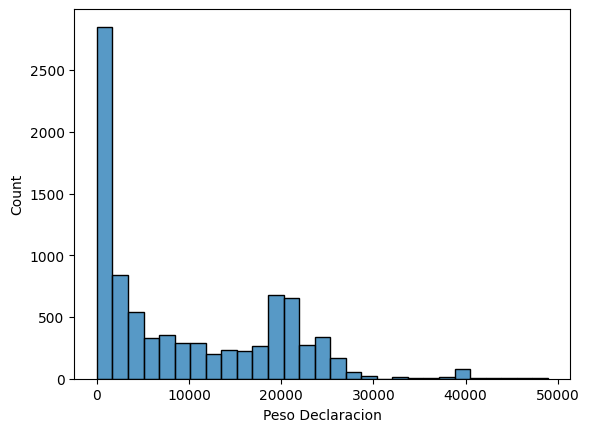

In [117]:
sns.histplot(data=data_noout, x='Peso Declaracion')

Muestra el histograma de la variable 'Fraccion Arancelaria' del conjunto de datos 'data_noout'

<Axes: xlabel='DIAS TARDA SALIR', ylabel='Count'>

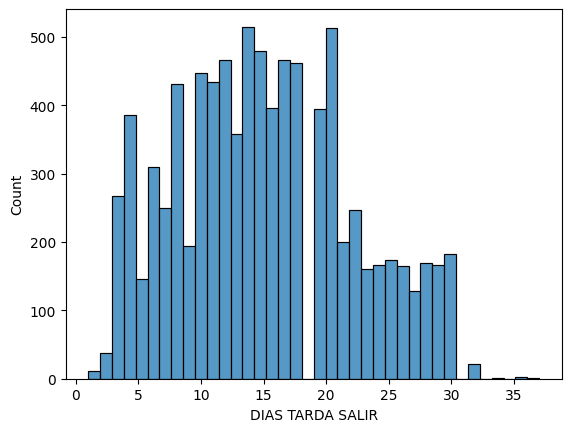

In [118]:
sns.histplot(data=data_noout, x='DIAS TARDA SALIR')

<Axes: xlabel='Cantidad de importaciones', ylabel='Count'>

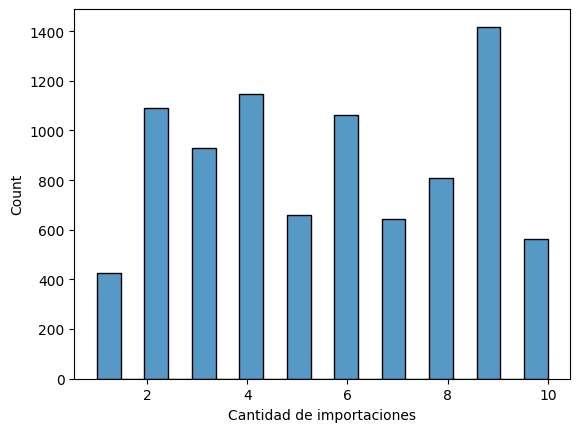

In [119]:
sns.histplot(data=data_noout, x='Cantidad de importaciones')

Muestra el histograma de la variable 'Valor Cif. $.' del conjunto de datos 'data_noout'

<Axes: xlabel='Valor Cif. $.', ylabel='Count'>

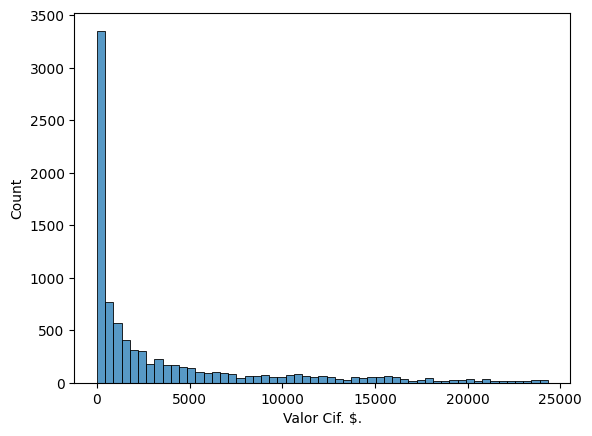

In [120]:
sns.histplot(data=data_noout, x='Valor Cif. $.')

importación de la función power_transform 

In [121]:
from sklearn.preprocessing import power_transform

Muestra el resumen de los datos contenidos del dataframe "data_noout".

In [122]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Peso Declaracion[float64],Mean (sd) : 9674.0 (9602.1)min < med < max:0.1 < 5710.1 < 48916.0IQR (CV) : 17906.6 (1.0),"1,838 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACg0lEQVR4nO3dMY7aQBSA4TdhQQYSjwAJOi4QKQUlfdocNm26FJyAG9AgJGSMcNbB2E5FFCnsgj04O4/8X70zpvjXZmaQbMqyFMB37976AwC3eLr2B8aYroh0as5/LMvyueZY4LdXQzXGdEej0ZcwDAd1Jt/v95Ex5iuxwtW1O2onDMPBfD5/ttamVSaO4zhYLBaD7XbbERFChZOrj34REWttOh6Pf9SYv1tjDPAXFlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS46T1T/yNerekXQr2AV2v6h1Av49WaniHUV/BqTX+wmIIKhAoVCBUqNPodNc/ztoiExpi6U7DNAxFpMNQkSdpZln2aTqetVqtVaeV8xjYPzhoL9Xg8PgVB0JvNZulkMomqjmebB39qfHuq3+/X3eIRcdjmcTxZCouiaNe9Nu7vIfdRXU+WsiwL8jz/mKbpdxGp+0+GO3rIUMXhZElEZLVaDZbLZe90OrWa+HCozutQHXYNwqIo2tbaqM7XjiiKOFnyjLehuuwa8Oh+PN6G6rJrwKP78Xgb6lmdXQMe3Y+HI1So4P0dVSPHo2OOjS8g1DtzPTrm2PgyQr0zl0Ugx8YvI9SGOBwdsxC8gMUUVOCO6pm3/A2v4w95nK59zU2hxnEcVJ34cDgEIiJJkgSbzab3L8drvfZ6vf7g+hve3W53MMZ8E5Gq44PhcPjZWvu+znUdry0i8rMsyxfH/QKqbCwx6g91bgAAAABJRU5ErkJggg=="">",0(0.0%)
2,DIAS TARDA SALIR[float64],Mean (sd) : 15.0 (7.1)min < med < max:1.0 < 15.0 < 37.0IQR (CV) : 10.0 (2.1),34 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqklEQVR4nO3cS47aQBCA4erwMg8ZISTYcYFIWbD0IXLYHGEWnIAbsENCyAhnHIxxFhHRRIIZ7LZDV8//7Q1e/AJclG2KohDAdV+efQLAI9rPPoGmGGP6ItK1eIlTURSvdZ0P7HgZqjGmP51Ov4dhOKn6GofDYW+M+UGsbvAyVBHphmE4iaLodTwep2UPjuM4WK1Wk91u1xURQnWAr6GKiMh4PE5ns9nPiof3az0ZWOFiCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChgtfbU89iubTNwvYNhFoz26VtFrZvI9Q78jzviEhojCl7aDgajWZRFB3KLm2zsH0fod6QJEkny7Jvi8Wi1Wq1SsWWZVmQ5/nXXq/3UnFpm4XtGwj1htPp1A6CYLBcLtP5fL4vc+xms5ms1+vB+XxuNXV+nxGhvmM4HJa+lWW/3/OJ2ADGU1CBUKFCo1/9PAQCdWksVB4CgTo1+YnKQyBQm8av+m0eApHneSgVh+6Xy6VT5T3hJmfHU3UM3dM0fRGRqk9KgUOcDZWhO95yNtQrhu4QYY4KJQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChU+/GfKYqeUxRDU5t1QbXZKWQxBnT76RK28U8piSDUWzxO48vKuiIeWUqrslLIYUp7NauOVr3dFOL899ZnYrDaK+H1XBKE6qMpq4xtefpMxnoIKhAoVCBUq8BvVM5bjLWdHW4TqEdvxlsujLUL1iM14y/XRFqF6yGK85exoi4spqECoUIFQoQKhQgVChQqEChUYT+Evl5e2CRUi4v7SNqFCRNxf2iZU/MPVpW0upqACoUIFQoUKD/1GjeM4KPvCx+MxEBFJkiTYbreD/3m81vfWet4ifxrJ87wt1cdbv4qiuDtt+A3+6ZUZKFG44gAAAABJRU5ErkJggg=="">",0(0.0%)
3,Cantidad de importaciones[float64],1. 9.02. 4.03. 2.04. 6.05. 3.06. 8.07. 5.08. 7.09. 10.010. 1.0,"1,418 (16.2%)1,148 (13.1%)1,092 (12.5%)1,063 (12.1%)930 (10.6%)807 (9.2%)660 (7.5%)645 (7.4%)564 (6.4%)426 (4.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD1klEQVR4nO3cTWobWQBG0afGhM5Ewhi8GC+iF9uL0G6MsQadkIkyyDSW6/emjc9ZgCuDyxNVvC+H6/U6oPDXn/4H8HmIjYzYyIiNjNjIiI2M2MiIjYzYyBzGGF/HGF92fs6P6/X6bedn8D939/Dw8M/xeLzf8yGXy+XlcDj8K7jP7e54PN4/PT19O51O3/d4wOvr69/n8/n++fn5yxhDbJ/Y3RhjnE6n74+Pj//t+JyvO/5tPggvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTuxvh1DWivB+z5t/lY7i6Xy8v5fL4fO14DulwuL2OMH3v9fT4G18LJHPwvRlT2ONmcYvzW5oMX4xbesungxbiFW/YYvBi38Fs+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZdPBi3MItmw9ejFt4i2vhZAxeyGx9sjnVeNOmgxdjF27ZbPBi7MJ7th68GLvwJh91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzGbrKssq3rPpusqyiltsEMhYV5FxspGxriJjXUXGuoqMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcS2cjMELmS1ONqcZk6wevBi5MNWqwYuRC3NsMXgxcmESH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIrBq8GLkwx+rBi5ELU7kWTsbghYwXBDJrfkb9fDLL4nWVVRVzLVpXWVWxxJp1lVUVs3hBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7NoXWVVxRKL11VWVczlWjgZ6yoyS042JxqLzB68GLqw1KzBi6ELaywZvBi6sIiPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGRmDV4MXVhj9uDF0IWlXAsnY/BCxgsCmbk/o35CWWzWusqyijUmr6s

Selecciona solo las columnas 'Peso Declaracion', 'DIAS TARDA SALIR', 'Cantidad de Importaciones', 'Valor Cif. $' del dataframe 'datanoout' y crea un nuevo dataframe llamado 'datanoout'.

In [123]:
data_noout = data_noout[['Peso Declaracion', 'DIAS TARDA SALIR','Cantidad de importaciones', 'Valor Cif. $.']]
data_noout 

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
0,1112.00,16.0,10.0,636.76
1,1112.00,16.0,10.0,4621.22
2,45.45,12.0,3.0,3600.00
3,38.50,9.0,9.0,1892.00
4,0.30,5.0,6.0,1.15
...,...,...,...,...
10192,620.00,13.0,4.0,60.00
10193,620.00,13.0,4.0,20.00
10194,620.00,13.0,4.0,40.00
10195,620.00,13.0,4.0,40.00


Se establece una semilla aleatoria con el valor 10 utilizando la función seed(10) y cada vez que se ejecute el código los números aleatorios generados serán los mismos.

In [124]:
import numpy as np
np.random.seed(10)

Guarda el resultado transformado en un nuevo dataframe llamado "df_new" donde las columnas del dataframe original son guardadas con los valores transformados.

In [125]:
from scipy import stats

lambdas = []
nombre = []
df_new = pd.DataFrame()

for x in data_noout.columns:
    df, lamb = stats.boxcox(data_noout[x])
    lambdas.append(lamb)
    nombre.append(x)
    df_new[x] = df

Muestra los valores de Lambda

In [126]:
df_lambdas = {
    'nombre' : nombre,
    'lambda' : lambdas
}

df_lambdas = pd.DataFrame(df_lambdas)
df_lambdas

,nombre,lambda
0,Peso Declaracion,0.275843
1,DIAS TARDA SALIR,0.681006
2,Cantidad de importaciones,0.708408
3,Valor Cif. $.,0.124225


Es un resumen estadístico de un DataFrame

In [127]:
df_new.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,8753.000000,8753.000000,8753.000000,8753.000000
mean,35.117950,7.580155,3.238579,10.988608
std,16.082368,3.062573,1.720373,4.999748
min,-1.477081,0.000000,0.000000,-2.501474
25%,21.668499,5.576160,1.662449,6.942102
50%,35.782412,7.816415,3.611407,11.111803
75%,51.318908,9.825849,4.746853,14.990758
max,67.641857,15.702894,5.801528,20.177027


Cambiando nombre de data_ab al dataframe

In [128]:
data_ab = df_new

Muestra la data_ab

In [129]:
data_ab.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,8753.000000,8753.000000,8753.000000,8753.000000
mean,35.117950,7.580155,3.238579,10.988608
std,16.082368,3.062573,1.720373,4.999748
min,-1.477081,0.000000,0.000000,-2.501474
25%,21.668499,5.576160,1.662449,6.942102
50%,35.782412,7.816415,3.611407,11.111803
75%,51.318908,9.825849,4.746853,14.990758
max,67.641857,15.702894,5.801528,20.177027


Muestra el histograma de la variable 'Peso Declaracion' del conjunto de datos 'data_ab'

<Axes: xlabel='Peso Declaracion', ylabel='Count'>

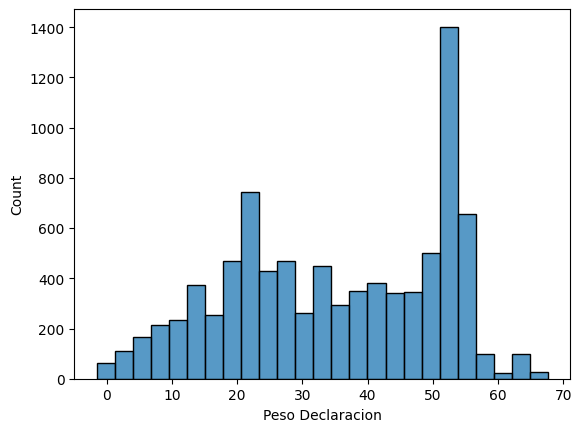

In [130]:
sns.histplot(data_ab,x= 'Peso Declaracion')

Muestra el histograma de la variable 'Fraccion Arancelaria' del conjunto de datos 'data_ab'

<Axes: xlabel='DIAS TARDA SALIR', ylabel='Count'>

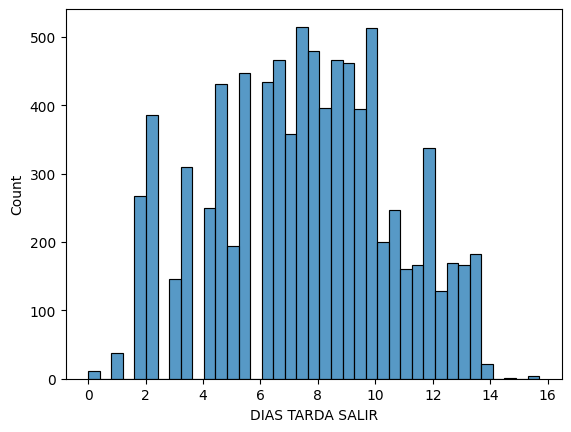

In [131]:
sns.histplot(data_ab,x= 'DIAS TARDA SALIR')

<Axes: xlabel='Cantidad de importaciones', ylabel='Count'>

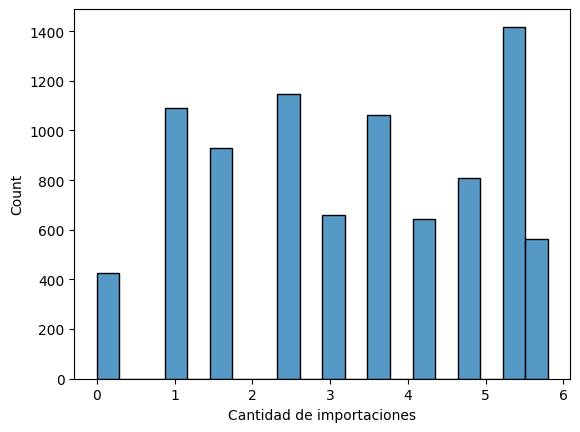

In [132]:
sns.histplot(data_ab,x= 'Cantidad de importaciones')

Muestra el histograma de la variable 'Valor Cif. $.' del conjunto de datos 'data_ab'

<Axes: xlabel='Valor Cif. $.', ylabel='Count'>

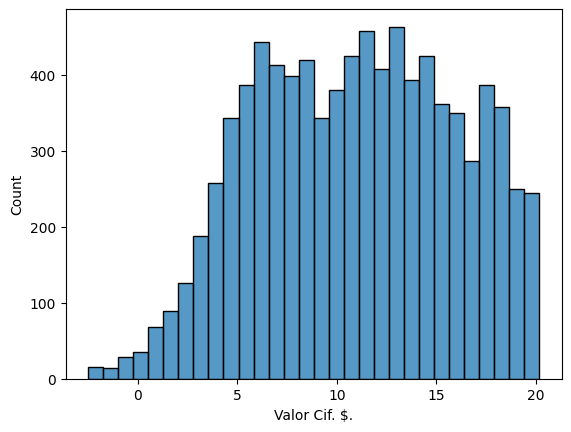

In [133]:
sns.histplot(data_ab,x= 'Valor Cif. $.')

Resumen estadístico de los datos en el DataFrame "data_ab"

In [134]:
data_ab.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,8753.000000,8753.000000,8753.000000,8753.000000
mean,35.117950,7.580155,3.238579,10.988608
std,16.082368,3.062573,1.720373,4.999748
min,-1.477081,0.000000,0.000000,-2.501474
25%,21.668499,5.576160,1.662449,6.942102
50%,35.782412,7.816415,3.611407,11.111803
75%,51.318908,9.825849,4.746853,14.990758
max,67.641857,15.702894,5.801528,20.177027


Importando la libreria Kmeans

In [135]:
from sklearn.cluster import KMeans

Genera y ajusta los modelos de KMeans con diferentes valores de k y guardando la inercia de cada modelo en una lista, así como los valores de k correspondientes en otra lista. Sirve para la visualización y selección del número óptimo de clusters para los datos.

In [136]:
inercia = []
ks = []

for k in range(1,60):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_ab)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Se crea un DataFrame llamado "codo" que contiene dos columnas:
"inercia": que se toma de la variable "inercia".
"k": que se toma de la variable "ks".

In [137]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

Es un gráfico de dispersión y una línea que conecta los puntos en un gráfico 2D, utilizando los datos codo,

<Axes: xlabel='k', ylabel='inercia'>

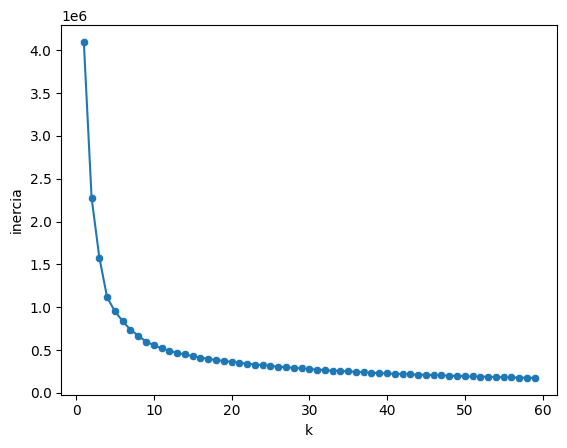

In [66]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

Se utiliza el algoritmo de clustering K-means para agrupar los datos en 5 clusters. El parámetro "randomstate = 10" se utiliza para obtener los mismos resultados cada vez que se ejecute el código. La función fit() se utiliza para ajustar el modelo a los datos de entrada "dataab".

In [138]:
modelo = KMeans(n_clusters=5,random_state = 10)
modelo.fit(data_ab)

c:\Users\50233\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=10)

Asigna una nueva columna llamada 'cluster' al dataframe 'datanoout'. Esta columna contiene las etiquetas de clúster asignadas por el modelo de clustering previamente definido. El resultado del código es el dataframe 'datanoout' con la nueva columna 'cluster'.

In [139]:
data_noout['cluster'] = modelo.labels_
data_noout

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.,cluster
0,1112.00,16.0,10.0,636.76,2
1,1112.00,16.0,10.0,4621.22,2
2,45.45,12.0,3.0,3600.00,3
3,38.50,9.0,9.0,1892.00,3
4,0.30,5.0,6.0,1.15,3
...,...,...,...,...,...
10192,620.00,13.0,4.0,60.00,2
10193,620.00,13.0,4.0,20.00,2
10194,620.00,13.0,4.0,40.00,2
10195,620.00,13.0,4.0,40.00,2


Muestra el número de registros en cada grupo de la columna 'cluster' en el dataframe 'data_noout' 

In [140]:
data_noout.groupby(by='cluster').count()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
cluster,,,,
0,1325,1325,1325,1325
1,2834,2834,2834,2834
2,1973,1973,1973,1973
3,1230,1230,1230,1230
4,1391,1391,1391,1391


Es la descripción estadística de los datos contenidos en el objeto "data_ab"

In [141]:
data_ab.describe()

,Peso Declaracion,DIAS TARDA SALIR,Cantidad de importaciones,Valor Cif. $.
count,8753.000000,8753.000000,8753.000000,8753.000000
mean,35.117950,7.580155,3.238579,10.988608
std,16.082368,3.062573,1.720373,4.999748
min,-1.477081,0.000000,0.000000,-2.501474
25%,21.668499,5.576160,1.662449,6.942102
50%,35.782412,7.816415,3.611407,11.111803
75%,51.318908,9.825849,4.746853,14.990758
max,67.641857,15.702894,5.801528,20.177027


Muestra la agrupación de datos de un DataFrame llamado "data_noout" por la columna "cluster" y luego calcula el valor mínimo, media y máximo para cada grupo generado.

In [142]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Peso Declaracion                         DIAS TARDA SALIR             \
                     min          mean       max              min       mean   
cluster                                                                        
0                1326.00   4013.403902   6577.51              2.0  15.556981   
1               13417.00  21909.351930  48916.00              3.0  17.561397   
2                 400.24   1269.095697   3020.71              2.0  12.648251   
3                   0.15    159.790740    462.16              1.0  10.751220   
4                6426.12  10472.526664  16828.56              3.0  16.516175   

              Cantidad de importaciones                 Valor Cif. $.  \
          max                       min      mean   max           min   
cluster                                                                 
0        30.0                       1.0  5.619623  10.0          2.00   
1        36.0                       1.0  5.604446  10.0          0.77   
2        30.0                       1.0  5.758236  10.0          0.65   
3        28.0                       1.0  5.464228  10.0          0.05   
4        37.0                       1.0  5.486700  10.0          0.50   

                                
                mean       max  
cluster                         
0        4316.264702  24150.00  
1        6200.360388  24332.00  
2         901.470071  24149.48  
3        1262.596618  22156.96  
4        3996.460726  24113.28

Caracteristicas de los cluster
0 Medio
1 Alto
2 Medio
3 Bajo
4 Alto

Este grafico muestra en el eje x los valores de la variable "Peso Declaración" y el eje y muestra los valores de la variable "Cantidad de Importaciones". Los puntos en el gráfico se agrupan y se colorean según los valores de la variable "cluster".
El gráfico de dispersión permite visualizar la relación entre dos variables numéricas (en este caso, "Peso Declaración" y "Cantidad de Immportaciones") y cómo se distribuyen los puntos según los diferentes grupos definidos por la variable "cluster".

<Axes: xlabel='Peso Declaracion', ylabel='DIAS TARDA SALIR'>

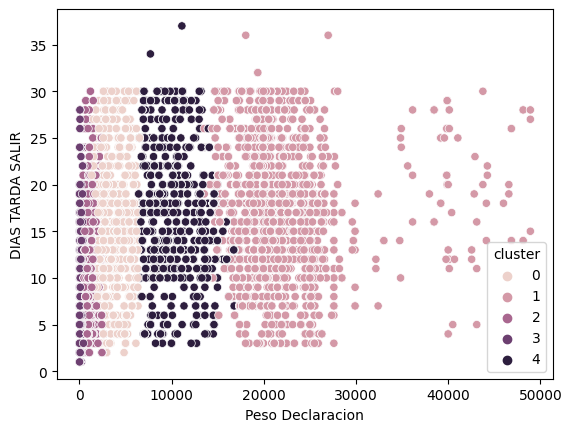

In [150]:
sns.scatterplot(data=data_noout,x='Peso Declaracion', y='DIAS TARDA SALIR', hue='cluster')

<Axes: xlabel='Peso Declaracion', ylabel='Cantidad de importaciones'>

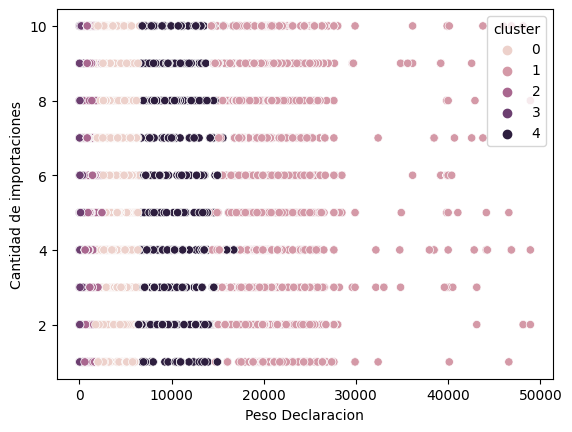

In [144]:
sns.scatterplot(data=data_noout,x='Peso Declaracion', y='Cantidad de importaciones', hue='cluster')

Este grafico muestra en el eje x los valores de la variable "Peso Declaración" y el eje y muestra los valores de la variable "Valor Cif. $.". Los puntos en el gráfico se agrupan y se colorean según los valores de la variable "cluster".
El gráfico de dispersión permite visualizar la relación entre dos variables numéricas (en este caso, "Peso Declaración" y "Valor Cif. $.") y cómo se distribuyen los puntos según los diferentes grupos definidos por la variable "cluster".

<Axes: xlabel='Peso Declaracion', ylabel='Valor Cif. $.'>

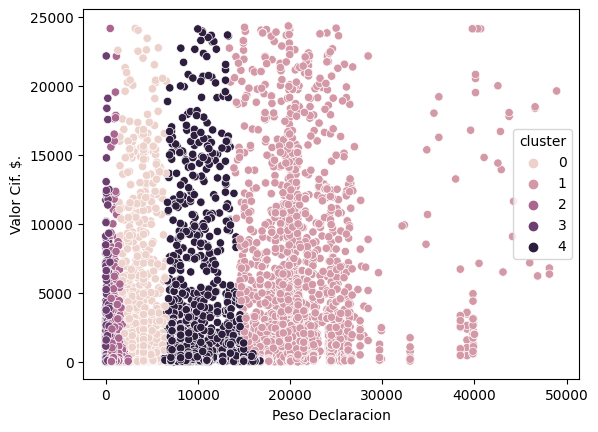

In [145]:
sns.scatterplot(data=data_noout,x='Peso Declaracion', y='Valor Cif. $.', hue='cluster')

Conclusion